# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
def generate_credit_scoring_data(n_samples=10000):
    np.random.seed(42)
    
    data = {
        'age': np.random.randint(18, 70, n_samples),
        'income': np.random.exponential(50000, n_samples),
        'credit_score': np.random.normal(650, 100, n_samples),
        'employment_length': np.random.exponential(5, n_samples),
        'debt_to_income': np.random.beta(2, 5, n_samples) * 100,
        'loan_amount': np.random.uniform(1000, 100000, n_samples),
        'loan_term': np.random.choice([12, 24, 36, 48, 60], n_samples),
        'previous_defaults': np.random.poisson(0.3, n_samples),
        'credit_inquiries': np.random.poisson(2, n_samples),
        'credit_history_months': np.random.uniform(12, 240, n_samples),
        'savings_balance': np.random.exponential(10000, n_samples),
        'checking_balance': np.random.exponential(5000, n_samples)
    }
    
    # Generate target variable
    risk_score = (
        data['age'] * 0.1 +
        data['income'] * 0.00001 +
        data['credit_score'] * 0.002 +
        data['employment_length'] * 0.05 -
        data['debt_to_income'] * 0.3 -
        data['previous_defaults'] * 50 -
        data['credit_inquiries'] * 10 +
        data['credit_history_months'] * 0.1 +
        np.random.normal(0, 10, n_samples)
    )
    
    data['default'] = (risk_score < 500).astype(int)
    
    return pd.DataFrame(data)

# Generate dataset
df = generate_credit_scoring_data(10000)
df.to_csv('credit_scoring_raw.csv', index=False)
print("Dataset generated and saved!")

Dataset generated and saved!


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    10000 non-null  int32  
 1   income                 10000 non-null  float64
 2   credit_score           10000 non-null  float64
 3   employment_length      10000 non-null  float64
 4   debt_to_income         10000 non-null  float64
 5   loan_amount            10000 non-null  float64
 6   loan_term              10000 non-null  int32  
 7   previous_defaults      10000 non-null  int32  
 8   credit_inquiries       10000 non-null  int32  
 9   credit_history_months  10000 non-null  float64
 10  savings_balance        10000 non-null  float64
 11  checking_balance       10000 non-null  float64
 12  default                10000 non-null  int32  
dtypes: float64(8), int32(5)
memory usage: 820.4 KB
None

Dataset Shape: (10000, 13)

Missing Valu

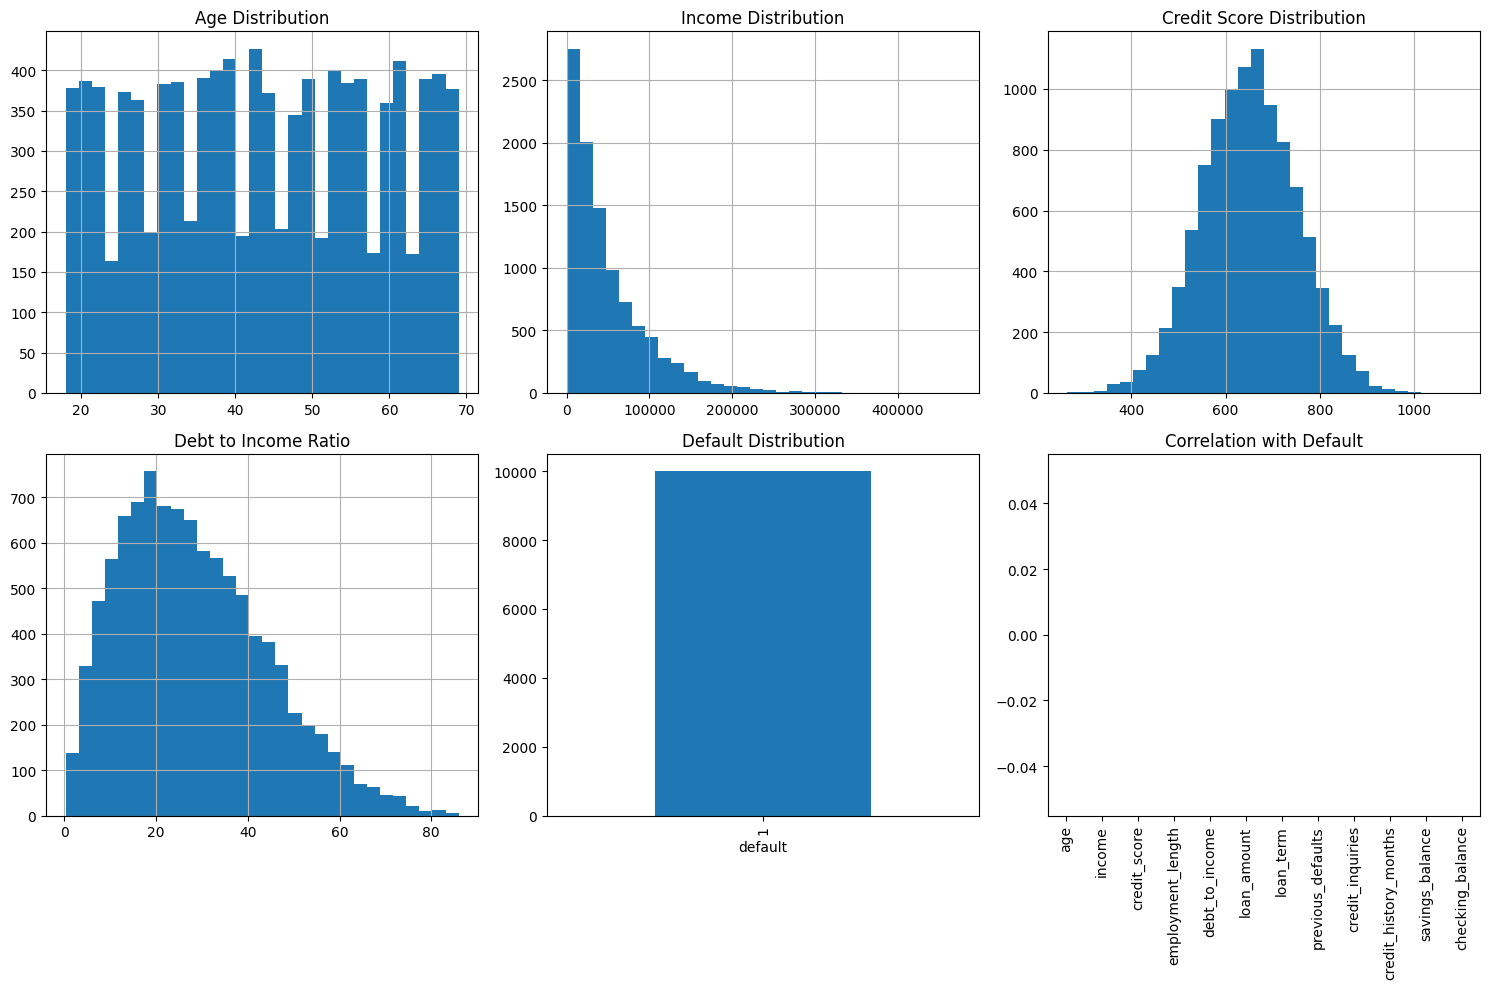

In [3]:
print("Dataset Info:")
print(df.info())
print("\nDataset Shape:", df.shape)
print("\nMissing Values:")
print(df.isnull().sum())
print("\nClass Distribution:")
print(df['default'].value_counts())

# Visualizations
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
df['age'].hist(ax=axes[0, 0], bins=30)
axes[0, 0].set_title('Age Distribution')
df['income'].hist(ax=axes[0, 1], bins=30)
axes[0, 1].set_title('Income Distribution')
df['credit_score'].hist(ax=axes[0, 2], bins=30)
axes[0, 2].set_title('Credit Score Distribution')
df['debt_to_income'].hist(ax=axes[1, 0], bins=30)
axes[1, 0].set_title('Debt to Income Ratio')
df['default'].value_counts().plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Default Distribution')
correlation = df.corr()['default'].drop('default')
correlation.plot(kind='bar', ax=axes[1, 2])
axes[1, 2].set_title('Correlation with Default')
plt.tight_layout()
plt.savefig('eda_visualizations.png')
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [4]:
def preprocess_data(df):
    # Handle outliers
    for col in ['income', 'credit_score', 'debt_to_income']:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.clip(df[col], lower_bound, upper_bound)
    
    # Feature scaling
    scaler = StandardScaler()
    numerical_cols = ['age', 'income', 'credit_score', 'employment_length', 
                     'debt_to_income', 'loan_amount', 'previous_defaults',
                     'credit_inquiries', 'credit_history_months', 
                     'savings_balance', 'checking_balance']
    
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    
    # Split features and target
    X = df.drop('default', axis=1)
    y = df['default']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    return X_train, X_test, y_train, y_test, scaler

# Apply preprocessing
X_train, X_test, y_train, y_test, scaler = preprocess_data(df)
print("Preprocessing completed!")
print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")

# Save preprocessed data
preprocessed_df = pd.concat([X_train, y_train], axis=1)
preprocessed_df.to_csv('credit_scoring_preprocessed.csv', index=False)

Preprocessing completed!
Training set: (8000, 12)
Testing set: (2000, 12)
